## Predicting the Purchase


#### Importing things

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Getting data

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Dropping Null Values

In [3]:
data=data.dropna()
data.shape

(400, 5)

##### Dropping irrelevant fields

In [4]:
data=data.drop(['User ID'],axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


##### Red-Hot Encoding the Gender field

In [5]:
data_encd=pd.get_dummies(data,columns=['Gender'],dtype='int')
data_encd.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


###### Getting the correlation btw the data

In [6]:
data_encd.corr()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
Age,1.000000,0.155238,0.622454,0.073741,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,0.060435,-0.060435
Purchased,0.622454,0.362083,1.000000,0.042469,-0.042469
Gender_Female,0.073741,0.060435,0.042469,1.000000,-1.000000
Gender_Male,-0.073741,-0.060435,-0.042469,-1.000000,1.000000


###### Dropping the irrelevant gender_male field

In [7]:
data_new=data_encd.drop(['Gender_Male'],axis=1)
data_new.head()

,Age,EstimatedSalary,Purchased,Gender_Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0


#### Spliting into Input and Output

In [8]:
x=data_new[['Age','EstimatedSalary','Gender_Female']]
y=data_new[['Purchased']]
y.shape
y=y.values.ravel()

##### Plotting box plot for different fields

<Axes: xlabel='Age'>

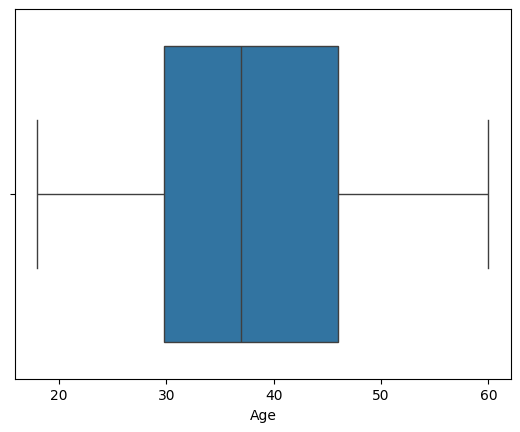

In [9]:
sns.boxplot(x=x['Age'])

<Axes: xlabel='EstimatedSalary'>

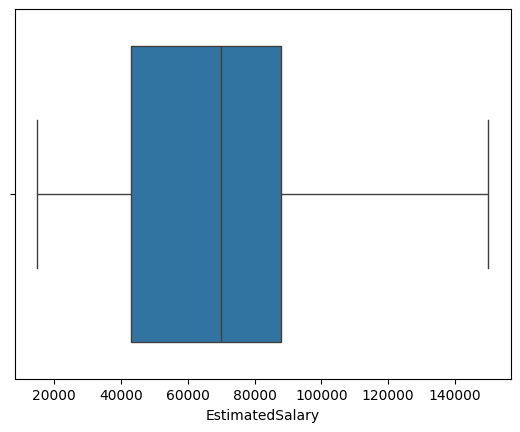

In [10]:
sns.boxplot(x=x['EstimatedSalary'])

<Axes: xlabel='Gender_Female'>

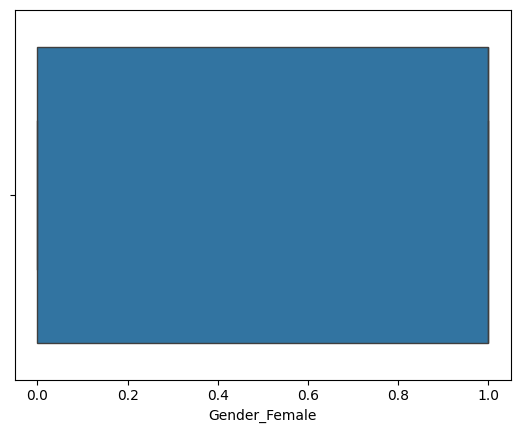

In [11]:
sns.boxplot(x=x['Gender_Female'])

##### Scaling the data

In [12]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scale=scale.fit_transform(x)
x_scale[:5]

array([[-1.78179743, -1.49004624, -1.02020406],
       [-0.25358736, -1.46068138, -1.02020406],
       [-1.11320552, -0.78528968,  0.98019606],
       [-1.01769239, -0.37418169,  0.98019606],
       [-1.78179743,  0.18375059, -1.02020406]])

#### Splitting into test and train

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y,test_size=0.3,random_state=42)
print(type(xtrain[0]))

<class 'numpy.ndarray'>


#### Performing Regression

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier

model_xgb=XGBClassifier()
model_xgb.fit(xtrain,ytrain)
ypred2=model_xgb.predict(xtest)
print("accuracy",accuracy_score(ypred2,ytest))
print('Confusion',confusion_matrix(ypred2,ytest))
print('class::',classification_report(ypred2,ytest))

accuracy 0.8666666666666667
Confusion [[67 10]
 [ 6 37]]
class::               precision    recall  f1-score   support

           0       0.92      0.87      0.89        77
           1       0.79      0.86      0.82        43

    accuracy                           0.87       120
   macro avg       0.85      0.87      0.86       120
weighted avg       0.87      0.87      0.87       120



#### End